In [1]:
pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(cv2.__version__)

4.10.0


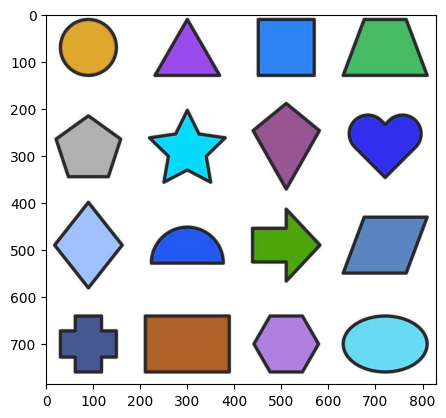

In [6]:
img = cv2.imread('shapes.jpg')

if img is None:
    print("Error: Unable to load the image.")
else:
    plt.imshow(img)

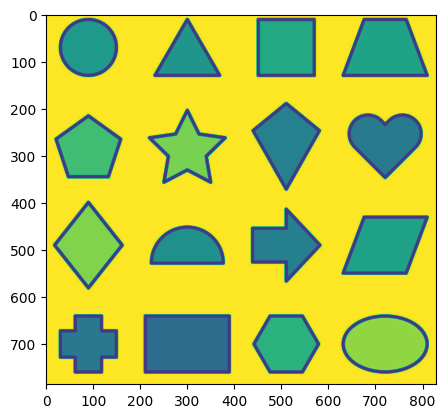

In [7]:
grey=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(grey)

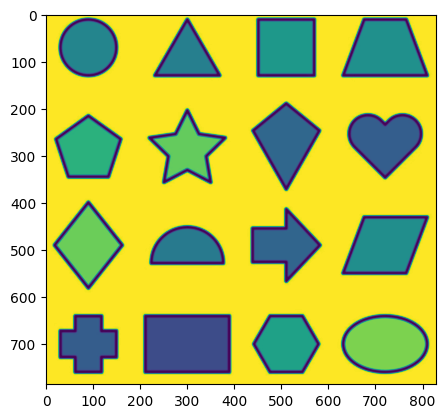

In [8]:
blurred=cv2.GaussianBlur(grey ,(5,5),0)
plt.imshow(blurred)

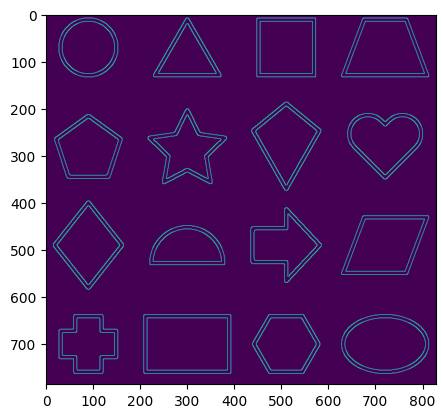

In [9]:
edges=cv2.Canny(blurred,50,150)
plt.imshow(edges)

1.4761904761904763
1.4761904761904763
0.7894736842105263
0.7789473684210526
1.4682539682539681
1.0


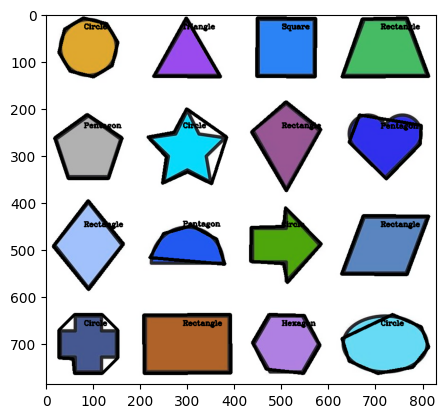

In [10]:
contours,_= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x, y, w, h = cv2.boundingRect(approx)
    
    if len(approx) == 3:
        objectType="Triangle"
        
    elif len(approx) == 4:
        
        aspectRatio = float(w) / h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            objectType="Square"
        else:
            objectType="Rectangle"
            
    elif len(approx) == 5:
        objectType="Pentagon"
    elif len(approx) == 6:
        objectType="Hexagon"
    else:
        objectType="Circle"
    
    cv2.putText(img,objectType, (x+(w//2)-10, y+(h//2)-40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0),2)
plt.imshow(img)

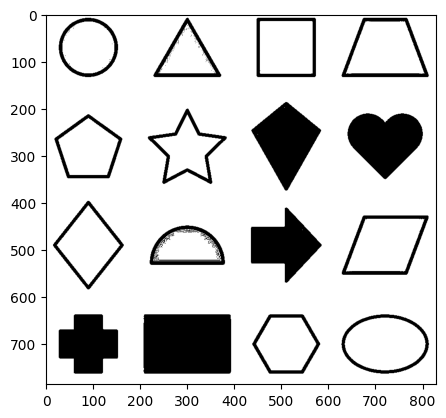

In [11]:
_, thresh=cv2.threshold(grey, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='grey')

In [12]:
# find contours in the binary image
contours,_ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
# draw contours in the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [14]:
import cv2

def find_triangles(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw on
    img_with_boxes = img.copy()

    # Iterate through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            # Draw a bounding box around the triangle (in red)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the result 
    cv2.imshow('Triangles with Bounding Boxes', img_with_boxes)
    cv2.waitKey(0)
    cv2.destroyAllWindows()